In [11]:
import xarray as xr
import rasterio as rio
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

In [8]:
veloc_vv_fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/mintpy_offsets_vv/velocityRg.h5'
veloc_vh_fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/mintpy_offsets_vh/velocityRg.h5'
dem_fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work_vv/merged/geom_reference/hgt.rdr.full'

In [9]:
vv_ds = xr.open_dataset(veloc_vv_fn)
vh_ds = xr.open_dataset(veloc_vh_fn)
dem_ds = gdal.Open(dem_fn, gdal.GA_ReadOnly)
dem = dem_ds.GetRasterBand(1).ReadAsArray()

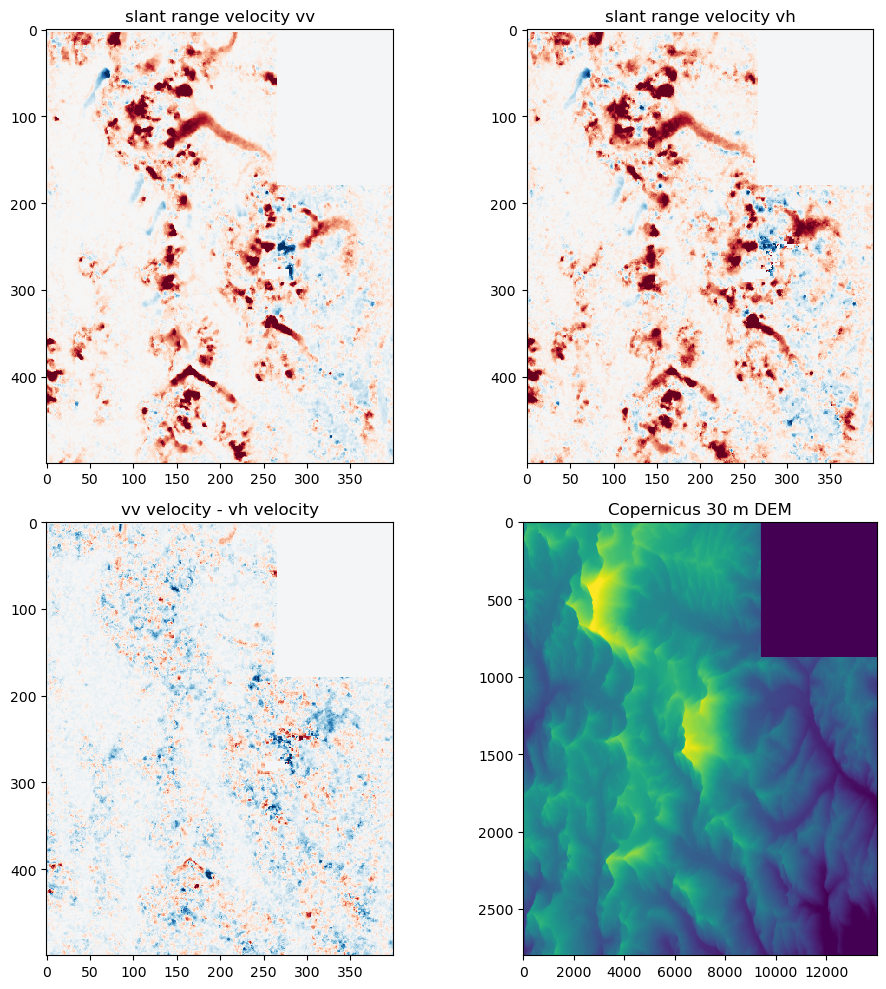

In [20]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))
pos = ax[0, 0].imshow(np.flip(vv_ds.velocity, 0)[0:500, 400:800]-0.4, cmap = 'RdBu_r', vmin=-20, vmax=20, interpolation='none')
ax[0, 0].set_title('slant range velocity vv')
pos = ax[0, 1].imshow(np.flip(vh_ds.velocity, 0)[0:500, 400:800]-0.4, cmap = 'RdBu_r', vmin=-20, vmax=20, interpolation='none')
ax[0, 1].set_title('slant range velocity vh')

pos = ax[1, 0].imshow(np.flip(vv_ds.velocity-vh_ds.velocity, 0)[0:500, 400:800]-0.4, cmap = 'RdBu_r', vmin=-20, vmax=20, interpolation='none')
ax[1, 0].set_title('vv velocity - vh velocity')

ax[1, 1].imshow(np.flip(dem, (0))[0:2800, 12500:26500], vmin=3000, vmax=8000)
ax[1, 1].set_title('Copernicus 30 m DEM')
ax[1, 1].set_aspect(6.13)

#f.colorbar(pos, ax=ax[0], shrink=0.4)

f.tight_layout()
#f.savefig('mean_velocity.png', dpi=400)